In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kurtosis, skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

In [2]:
# Read File
excel_name = "EDIT 1 DATA PENGUKURAN.xlsx"

# Membaca file Excel menjadi DataFrame menggunakan pandas
def read_excel_file(file_path):
    return pd.read_excel(file_path)

# Mencoba membaca file Excel
try:
    df = read_excel_file(excel_name)
except Exception as e:
    print(f"Error reading Excel file: {e}")
    df = None

Memulai Uji Statistik

In [3]:
# 1. Nilai maksimum dan minimum masing-masing kolom
max_values = df.max()
min_values = df.min()
output_table = pd.DataFrame({'Max': max_values, 'Min': min_values})

In [4]:
# 2. Nilai mean, median, modus dalam suatu kolom
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Mengambil modus pertama jika ada lebih dari satu modus
output_table['Mean'] = mean_values
output_table['Median'] = median_values
output_table['Mode'] = mode_values

In [5]:
# 3. Nilai standar deviasi masing-masing kolom
std_dev_values = df.std()
output_table['Std Dev'] = std_dev_values

In [6]:
 # Menampilkan tabel output
print("Tabel Output Statistik:")
print(output_table)

Tabel Output Statistik:
                     Max         Min        Mean      Median    Mode  \
entry_id     1230.000000    1.000000  615.500000  615.500000    1.00   
TDS           654.340000  310.460000  433.042366  413.720000  372.33   
pH              8.740000    0.260000    7.571911    7.400000    7.25   
Turbidity 1     5.730000    1.010000    3.026023    2.795000    2.25   
Turbidity 2     5.730000    1.010000    3.067041    2.890000    2.00   
Turbidity 3     6.840000    1.010000    3.098121    2.695000    2.00   
Kekeruhan       5.993333    1.066667    3.063728    2.826667    2.00   
Amonia          0.930000    0.030000    0.314528    0.310000    0.20   
latitude             NaN         NaN         NaN         NaN     NaN   
longitude            NaN         NaN         NaN         NaN     NaN   
elevation            NaN         NaN         NaN         NaN     NaN   
status               NaN         NaN         NaN         NaN     NaN   

                Std Dev  
entry_id     

In [7]:
# Simpan tabel output ke file Excel dengan nama kolom
output_excel_name = "Uji_Statistik.xlsx"
with pd.ExcelWriter(output_excel_name, engine='xlsxwriter') as writer:
 output_table.to_excel(writer, sheet_name='Statistik', index=True)

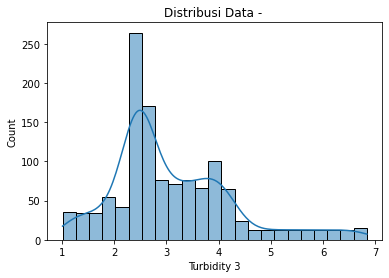

In [8]:
# Visualisasi distribusi data menggunakan histogram
sns.histplot(df['Turbidity 3'], kde=True)
plt.title('Distribusi Data - ')
plt.show()

In [9]:
# Uji Normalitas menggunakan Shapiro-Wilk
stat, p_value = shapiro(df['Turbidity 3'])
print(f'\nStatistik Shapiro-Wilk: {stat}, p-value: {p_value}')
if p_value > 0.05:
    print('Data terdistribusi normal')
else:
    print('Data tidak terdistribusi normal')


Statistik Shapiro-Wilk: 0.9244468808174133, p-value: 2.2606548677404106e-24
Data tidak terdistribusi normal


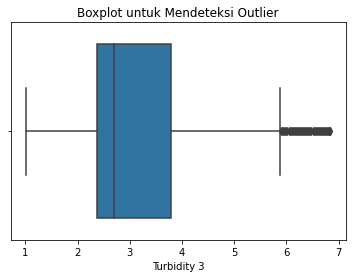

In [10]:
# Uji Outlier menggunakan Boxplot
sns.boxplot(x=df['Turbidity 3'])
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()

In [11]:
# Menghitung Kurtosis dan Skewness
kurt = kurtosis(df['Turbidity 3'])
skewness = skew(df['Turbidity 3'])
print(f'\nKurtosis: {kurt}, Skewness: {skewness}')


Kurtosis: 1.0911254873188057, Skewness: 1.0189009368561455


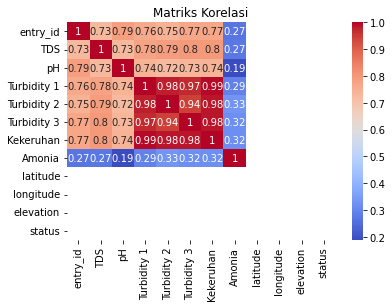

In [12]:
# Analisis Korelasi antar Variabel
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()